In [18]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
from scipy import interp, stats
from fractions import Fraction

from df_functions import count_aromaticAA
from profile_distances import make_profile
import string
import seaborn as sns
import joblib
import matplotlib
import numpy as np
from IPython import display
from pyteomics import electrochem, mass, parser
from sklearn import feature_extraction, metrics, preprocessing, model_selection

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve #balanced_accuracy_score

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['xtick.labelsize'] = 6

from joblib import dump, load
sns.set()

In [19]:
!ls

BCRTESTDFfeatures.csv
BCRdataCDRpept_nonpept.csv
BCRdataCDRpeptnonpept_LPS.csv
BCRdataCDRpeptnonpept_LPS_enriched.csv
HUMANBCRdataCDRpept_nonpept.csv
HUMANBCRdataCDRpeptnonpept_LPS_enriched.csv
KABABCRdataCDRpeptnonpept_LPS_enrichedfeatures.csv
KABATBCRdataCDRpeptnonpept_LPS_enriched.csv
KABATBCRdataCDRpeptnonpept_PNEUMO.csv
RFCDR3peptnonpept_LPS_enriched.joblib
TESTBCRdataCDRpeptnonpept_LPS_enriched.csv
__pycache__
data
data_labeling.ipynb
df_functions.py
epitope_labels.pdf
featurematrix.ipynb
featurespept_nonpept.csv
featurespeptnonpept_LPS.csv
featurespeptnonpept_LPS_enriched.csv
figdir
get_data_IEDB.ipynb
nonLPS_peptide.csv
nonLPSfeautrues.csv
non_peptide_clf.ipynb
non_peptides.csv
organism_dict.json
pneumoootjes.csv
pneumotestje.csv
profile_distances.py


In [20]:
#data = pd.read_csv('featurespept_nonpept.csv') # pept vs non pept 6007: {0: 5077, 1: 930} 
#data = pd.read_csv('featurespeptnonpept_LPS.csv') # peptides and non peptides vs LPS 5848 {0: 5572, 1: 276}
#data = pd.read_csv('featurespeptnonpept_LPS_enriched.csv')# peptides and non peptides vs enriched LPS 5959: {0: 5572, 1: 387}
data = pd.read_csv('KABABCRdataCDRpeptnonpept_LPS_enrichedfeatures.csv') # pept vs non pept 6007: {0: 5077, 1: 930}k


LPS = True
weights = 'balanced'
figfolder = 'KABABCRdataCDRpeptnonpept_LPS_enrichedfeatures'
figdir = Path('figdir') / figfolder 

In [21]:
print(data.shape)
#get_LPS_test_set

(4675, 644)


In [22]:
df_dict = {}
regions = list(data['region'].unique())

for x in regions:
    df_name = x
    df = data[data['region'] == x]
    df_dict[df_name] = df
    pn_counts = Counter(df['peptide_label'])
    print('Number of values in {}, n = {}, p={}:'.format(df_name, pn_counts[0], pn_counts[1]),len(df))

Number of values in HCDR3, n = 1111, p=159: 1270
Number of values in HCDR2, n = 814, p=48: 862
Number of values in HCDR1, n = 679, p=43: 722
Number of values in LCDR3, n = 882, p=41: 923
Number of values in LCDR2, n = 216, p=28: 244
Number of values in LCDR1, n = 611, p=43: 654


(1270, 642)
HCDR3: Number of negatives and positives: Counter({0: 1111, 1: 159})


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[[217   6]
 [ 19  13]]              precision    recall  f1-score   support

          0       0.92      0.97      0.95       223
          1       0.68      0.41      0.51        32

avg / total       0.89      0.90      0.89       255

[[219   3]
 [ 28   4]]              precision    recall  f1-score   support

          0       0.89      0.99      0.93       222
          1       0.57      0.12      0.21        32

avg / total       0.85      0.88      0.84       254

[[218   4]
 [ 27   5]]              precision    recall  f1-score   support

          0       0.89      0.98      0.93       222
          1       0.56      0.16      0.24        32

avg / total       0.85      0.88      0.85       254

[[209  13]
 [ 25   7]]              precision    recall  f1-score   support

          0       0.89      0.94      0.92       222
          1       0.35      0.22      0.27        32

avg / total       0.82      0.85      0.84       254

[[215   7]
 [ 26   5]]              precision   

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[215   7]
 [ 24   7]]              precision    recall  f1-score   support

          0       0.90      0.97      0.93       222
          1       0.50      0.23      0.31        31

avg / total       0.85      0.88      0.86       253



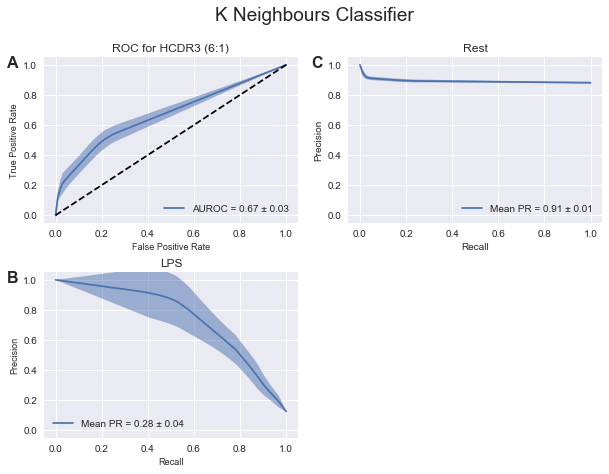

Student T test: t = 19.005655899448037, p-value = 2.1442393143524396e-11
Approximated baseline PR curve P/(P+N) =0.14285714285714285
Approximated baseline PR curve N/(N+P) =0.8571428571428571
Mean classifier accuracy = 0.8761085287496468 +/- 0.01206581233501049)
Mean Error rate = 0.12389147125035316 +/- 0.01206581233501049
Mean classifier precision = 0.5212116781853624 +/- 0.10374047295482808)
Mean classifier recall = 0.21364247311827952 +/- 0.06323114085370986)
Mean classifier AUC = 0.667941873234438 +/- 0.0330628394968751)
Mean classifier null accuracy = 0.8748054807494565 +/- 0.0013461067381496034)
[[220   3]
 [ 27   5]]              precision    recall  f1-score   support

          0       0.89      0.99      0.94       223
          1       0.62      0.16      0.25        32

avg / total       0.86      0.88      0.85       255

[[219   3]
 [ 25   7]]              precision    recall  f1-score   support

          0       0.90      0.99      0.94       222
          1       0.70 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


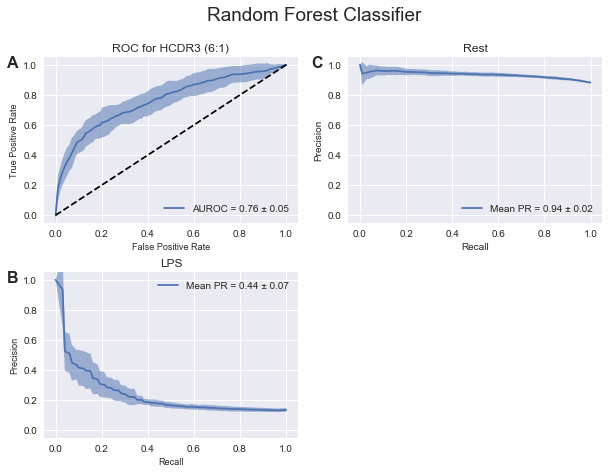

Student T test: t = 19.792018329378855, p-value = 1.2389922854129356e-11
Approximated baseline PR curve P/(P+N) =0.14285714285714285
Approximated baseline PR curve N/(N+P) =0.8571428571428571
Mean classifier accuracy = 0.8847679119161488 +/- 0.0077967949107107535)
Mean Error rate = 0.11523208808385121 +/- 0.0077967949107107535
Mean classifier precision = 0.6596296296296296 +/- 0.1308778420749873)
Mean classifier recall = 0.1674059139784946 +/- 0.04720565203078217)
Mean classifier AUC = 0.7609477755818888 +/- 0.04933186478606323)
Mean classifier null accuracy = 0.8748054807494565 +/- 0.0013461067381496034)
(862, 642)
HCDR2: Number of negatives and positives: Counter({0: 814, 1: 48})


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[[159   4]
 [ 10   0]]              precision    recall  f1-score   support

          0       0.94      0.98      0.96       163
          1       0.00      0.00      0.00        10

avg / total       0.89      0.92      0.90       173

[[158   5]
 [  9   1]]              precision    recall  f1-score   support

          0       0.95      0.97      0.96       163
          1       0.17      0.10      0.12        10

avg / total       0.90      0.92      0.91       173

[[157   6]
 [  7   3]]              precision    recall  f1-score   support

          0       0.96      0.96      0.96       163
          1       0.33      0.30      0.32        10

avg / total       0.92      0.92      0.92       173

[[160   3]
 [  7   2]]              precision    recall  f1-score   support

          0       0.96      0.98      0.97       163
          1       0.40      0.22      0.29         9

avg / total       0.93      0.94      0.93       172

[[156   6]
 [  8   1]]              precision   

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[160   2]
 [  8   1]]              precision    recall  f1-score   support

          0       0.95      0.99      0.97       162
          1       0.33      0.11      0.17         9

avg / total       0.92      0.94      0.93       171



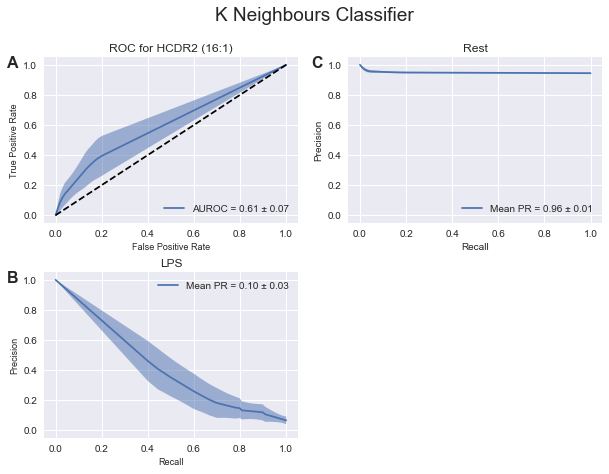

Student T test: t = 5.757463152250294, p-value = 4.958967358783203e-05
Approximated baseline PR curve P/(P+N) =0.058823529411764705
Approximated baseline PR curve N/(N+P) =0.9411764705882353
Mean classifier accuracy = 0.9230441902129523 +/- 0.010940730846763514)
Mean Error rate = 0.07695580978704775 +/- 0.010940730846763514
Mean classifier precision = 0.20285714285714287 +/- 0.1150534727302987)
Mean classifier recall = 0.1177777777777778 +/- 0.07334455581917963)
Mean classifier AUC = 0.6055367887769614 +/- 0.06858619757720544)
Mean classifier null accuracy = 0.944326487006601 +/- 0.002610445800066445)
[[161   2]
 [ 10   0]]              precision    recall  f1-score   support

          0       0.94      0.99      0.96       163
          1       0.00      0.00      0.00        10

avg / total       0.89      0.93      0.91       173

[[159   4]
 [ 10   0]]              precision    recall  f1-score   support

          0       0.94      0.98      0.96       163
          1       0.00 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[160   2]
 [  9   0]]              precision    recall  f1-score   support

          0       0.95      0.99      0.97       162
          1       0.00      0.00      0.00         9

avg / total       0.90      0.94      0.92       171



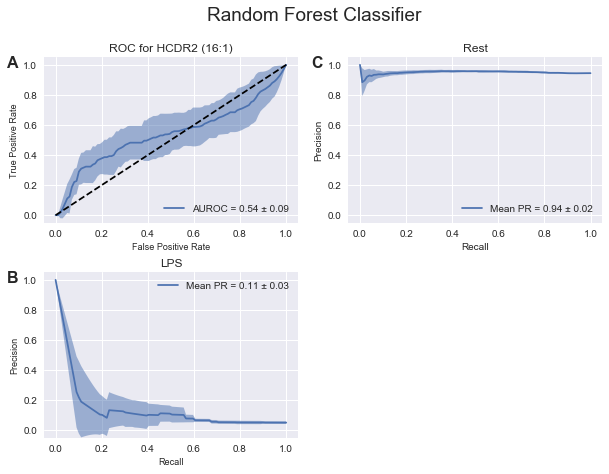

Student T test: t = 1.6594556852872262, p-value = 0.11924907962533535
Approximated baseline PR curve P/(P+N) =0.058823529411764705
Approximated baseline PR curve N/(N+P) =0.9411764705882353
Mean classifier accuracy = 0.9234430155387273 +/- 0.010563302396780218)
Mean Error rate = 0.07655698446127268 +/- 0.010563302396780218
Mean classifier precision = 0.04111111111111111 +/- 0.08363648562915028)
Mean classifier recall = 0.020000000000000004 +/- 0.04)
Mean classifier AUC = 0.53781528328298 +/- 0.08526400269870492)
Mean classifier null accuracy = 0.944326487006601 +/- 0.002610445800066445)
(722, 642)
HCDR1: Number of negatives and positives: Counter({0: 679, 1: 43})


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[[134   2]
 [  9   0]]              precision    recall  f1-score   support

          0       0.94      0.99      0.96       136
          1       0.00      0.00      0.00         9

avg / total       0.88      0.92      0.90       145

[[134   2]
 [  9   0]]              precision    recall  f1-score   support

          0       0.94      0.99      0.96       136
          1       0.00      0.00      0.00         9

avg / total       0.88      0.92      0.90       145

[[136   0]
 [  8   1]]              precision    recall  f1-score   support

          0       0.94      1.00      0.97       136
          1       1.00      0.11      0.20         9

avg / total       0.95      0.94      0.92       145

[[135   1]
 [  8   0]]              precision    recall  f1-score   support

          0       0.94      0.99      0.97       136
          1       0.00      0.00      0.00         8

avg / total       0.89      0.94      0.91       144

[[133   2]
 [  8   0]]              precision   

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[135   0]
 [  8   0]]              precision    recall  f1-score   support

          0       0.94      1.00      0.97       135
          1       0.00      0.00      0.00         8

avg / total       0.89      0.94      0.92       143



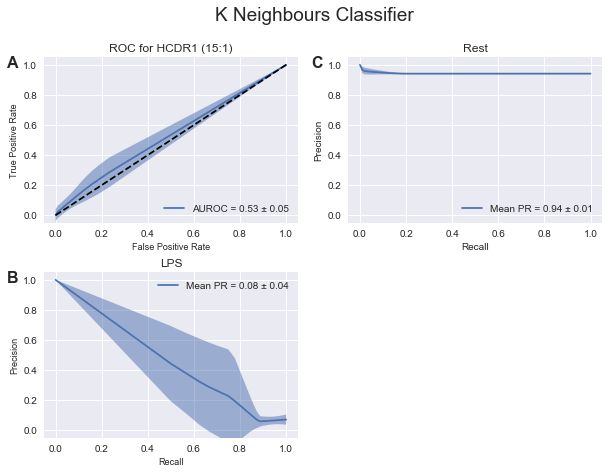

Student T test: t = 2.0695039150095256, p-value = 0.05747975718964661
Approximated baseline PR curve P/(P+N) =0.0625
Approximated baseline PR curve N/(N+P) =0.9375
Mean classifier accuracy = 0.933079892648858 +/- 0.009833766539009267)
Mean Error rate = 0.06692010735114196 +/- 0.009833766539009267
Mean classifier precision = 0.14444444444444446 +/- 0.33811386788228753)
Mean classifier recall = 0.023148148148148147 +/- 0.04638879648101981)
Mean classifier AUC = 0.5288650599128542 +/- 0.05218794893756265)
Mean classifier null accuracy = 0.9404586983897328 +/- 0.003098180190872864)
[[136   0]
 [  9   0]]              precision    recall  f1-score   support

          0       0.94      1.00      0.97       136
          1       0.00      0.00      0.00         9

avg / total       0.88      0.94      0.91       145

[[136   0]
 [  9   0]]              precision    recall  f1-score   support

          0       0.94      1.00      0.97       136
          1       0.00      0.00      0.00     

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[135   0]
 [  8   0]]              precision    recall  f1-score   support

          0       0.94      1.00      0.97       135
          1       0.00      0.00      0.00         8

avg / total       0.89      0.94      0.92       143



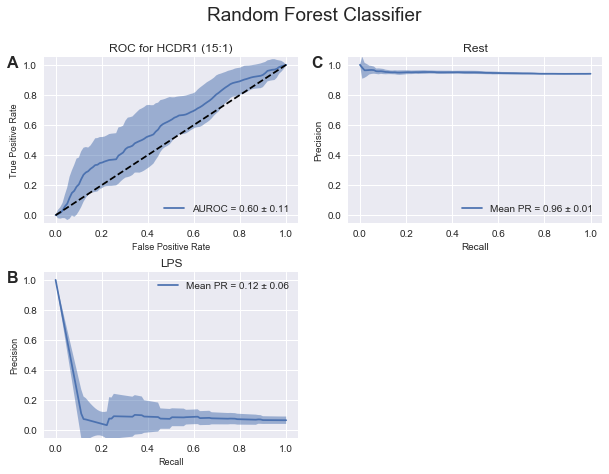

Student T test: t = 3.4942796201812674, p-value = 0.0035756278248549036
Approximated baseline PR curve P/(P+N) =0.0625
Approximated baseline PR curve N/(N+P) =0.9375
Mean classifier accuracy = 0.9399957354267698 +/- 0.002984778176005521)
Mean Error rate = 0.06000426457323016 +/- 0.002984778176005521
Mean classifier precision = 0.0 +/- 0.0)
Mean classifier recall = 0.0 +/- 0.0)
Mean classifier AUC = 0.5981399782135077 +/- 0.10508780473651845)
Mean classifier null accuracy = 0.9404586983897328 +/- 0.003098180190872864)
(923, 642)
LCDR3: Number of negatives and positives: Counter({0: 882, 1: 41})


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[[177   0]
 [  9   0]]              precision    recall  f1-score   support

          0       0.95      1.00      0.98       177
          1       0.00      0.00      0.00         9

avg / total       0.91      0.95      0.93       186

[[174   3]
 [  8   0]]              precision    recall  f1-score   support

          0       0.96      0.98      0.97       177
          1       0.00      0.00      0.00         8

avg / total       0.91      0.94      0.93       185

[[176   0]
 [  7   1]]              precision    recall  f1-score   support

          0       0.96      1.00      0.98       176
          1       1.00      0.12      0.22         8

avg / total       0.96      0.96      0.95       184

[[176   0]
 [  8   0]]              precision    recall  f1-score   support

          0       0.96      1.00      0.98       176
          1       0.00      0.00      0.00         8

avg / total       0.91      0.96      0.94       184

[[175   1]
 [  7   1]]              precision   

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[176   0]
 [  7   1]]              precision    recall  f1-score   support

          0       0.96      1.00      0.98       176
          1       1.00      0.12      0.22         8

avg / total       0.96      0.96      0.95       184



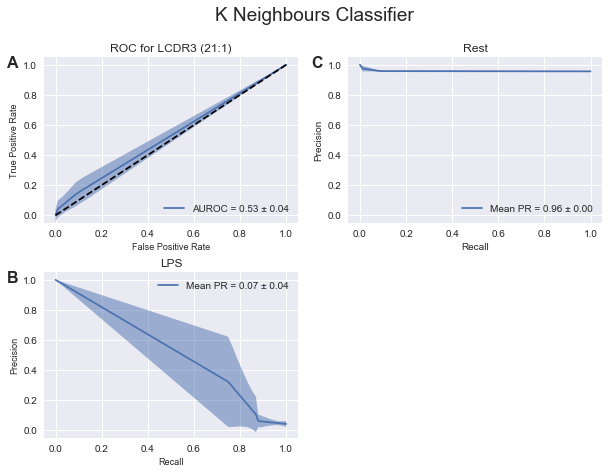

Student T test: t = 2.4163473115604908, p-value = 0.02991670566350484
Approximated baseline PR curve P/(P+N) =0.045454545454545456
Approximated baseline PR curve N/(N+P) =0.9545454545454546
Mean classifier accuracy = 0.9534267507339037 +/- 0.005399419386404506)
Mean Error rate = 0.046573249266096295 +/- 0.005399419386404506
Mean classifier precision = 0.2 +/- 0.35590260840104376)
Mean classifier recall = 0.03333333333333333 +/- 0.05527707983925667)
Mean classifier AUC = 0.5276148966120717 +/- 0.04276102255632643)
Mean classifier null accuracy = 0.9555869754747737 +/- 0.0019891197934525694)
[[176   1]
 [  9   0]]              precision    recall  f1-score   support

          0       0.95      0.99      0.97       177
          1       0.00      0.00      0.00         9

avg / total       0.91      0.95      0.93       186

[[177   0]
 [  8   0]]              precision    recall  f1-score   support

          0       0.96      1.00      0.98       177
          1       0.00      0.00   

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[175   1]
 [  8   0]]              precision    recall  f1-score   support

          0       0.96      0.99      0.97       176
          1       0.00      0.00      0.00         8

avg / total       0.91      0.95      0.93       184



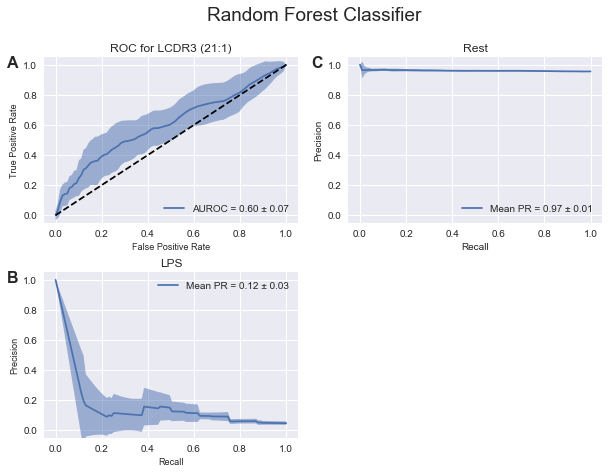

Student T test: t = 5.173202781511956, p-value = 0.00014135107576468888
Approximated baseline PR curve P/(P+N) =0.045454545454545456
Approximated baseline PR curve N/(N+P) =0.9545454545454546
Mean classifier accuracy = 0.953418916813026 +/- 0.0032099480440930445)
Mean Error rate = 0.04658108318697396 +/- 0.0032099480440930445
Mean classifier precision = 0.0 +/- 0.0)
Mean classifier recall = 0.0 +/- 0.0)
Mean classifier AUC = 0.6028930280916509 +/- 0.07442013678306734)
Mean classifier null accuracy = 0.9555869754747737 +/- 0.0019891197934525694)
(244, 642)
LCDR2: Number of negatives and positives: Counter({0: 216, 1: 28})
[[42  2]
 [ 6  0]]              precision    recall  f1-score   support

          0       0.88      0.95      0.91        44
          1       0.00      0.00      0.00         6

avg / total       0.77      0.84      0.80        50

[[42  1]
 [ 6  0]]              precision    recall  f1-score   support

          0       0.88      0.98      0.92        43
          1

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[41  2]
 [ 6  0]]              precision    recall  f1-score   support

          0       0.87      0.95      0.91        43
          1       0.00      0.00      0.00         6

avg / total       0.77      0.84      0.80        49

[[41  2]
 [ 5  0]]              precision    recall  f1-score   support

          0       0.89      0.95      0.92        43
          1       0.00      0.00      0.00         5

avg / total       0.80      0.85      0.83        48

[[42  1]
 [ 5  0]]              precision    recall  f1-score   support

          0       0.89      0.98      0.93        43
          1       0.00      0.00      0.00         5

avg / total       0.80      0.88      0.84        48

[[43  1]
 [ 6  0]]              precision    recall  f1-score   support

          0       0.88      0.98      0.92        44
          1       0.00      0.00      0.00         6

avg / total       0.77      0.86      0.81        50

[[41  2]
 [ 6  0]]              precision    recall  f1-score   

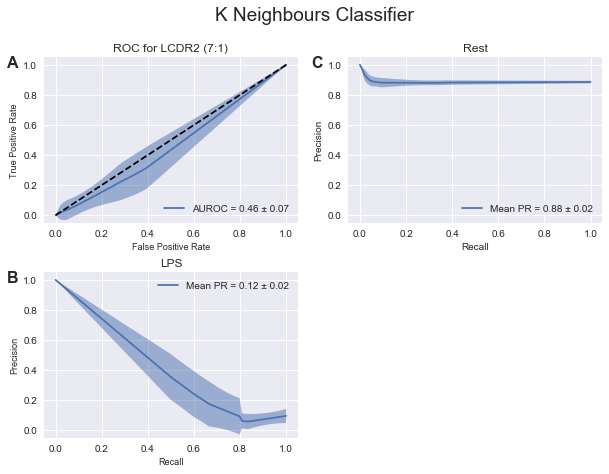

Student T test: t = -2.114554528438288, p-value = 0.05288822708584337
Approximated baseline PR curve P/(P+N) =0.125
Approximated baseline PR curve N/(N+P) =0.875
Mean classifier accuracy = 0.8511383219954648 +/- 0.025069235939028687)
Mean Error rate = 0.1488616780045352 +/- 0.025069235939028687
Mean classifier precision = 0.05555555555555555 +/- 0.14487116456005888)
Mean classifier recall = 0.02666666666666667 +/- 0.0679869268479038)
Mean classifier AUC = 0.4584196617336152 +/- 0.07357548728425631)
Mean classifier null accuracy = 0.8853537414965987 +/- 0.008603152339803655)
[[44  0]
 [ 6  0]]              precision    recall  f1-score   support

          0       0.88      1.00      0.94        44
          1       0.00      0.00      0.00         6

avg / total       0.77      0.88      0.82        50

[[43  0]
 [ 6  0]]              precision    recall  f1-score   support

          0       0.88      1.00      0.93        43
          1       0.00      0.00      0.00         6

avg /

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[43  0]
 [ 5  0]]              precision    recall  f1-score   support

          0       0.90      1.00      0.95        43
          1       0.00      0.00      0.00         5

avg / total       0.80      0.90      0.85        48



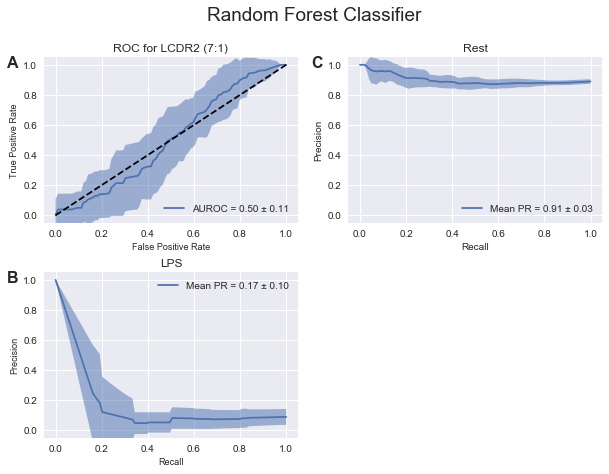

Student T test: t = 0.1291675573251033, p-value = 0.8990624174919772
Approximated baseline PR curve P/(P+N) =0.125
Approximated baseline PR curve N/(N+P) =0.875
Mean classifier accuracy = 0.8799387755102043 +/- 0.015252212696291269)
Mean Error rate = 0.12006122448979573 +/- 0.015252212696291269
Mean classifier precision = 0.0 +/- 0.0)
Mean classifier recall = 0.0 +/- 0.0)
Mean classifier AUC = 0.5038653981677238 +/- 0.1119708068078127)
Mean classifier null accuracy = 0.8853537414965987 +/- 0.008603152339803655)
(654, 642)
LCDR1: Number of negatives and positives: Counter({0: 611, 1: 43})
[[121   2]
 [  8   1]]              precision    recall  f1-score   support

          0       0.94      0.98      0.96       123
          1       0.33      0.11      0.17         9

avg / total       0.90      0.92      0.91       132



/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[[122   0]
 [  8   1]]              precision    recall  f1-score   support

          0       0.94      1.00      0.97       122
          1       1.00      0.11      0.20         9

avg / total       0.94      0.94      0.92       131

[[115   7]
 [  9   0]]              precision    recall  f1-score   support

          0       0.93      0.94      0.93       122
          1       0.00      0.00      0.00         9

avg / total       0.86      0.88      0.87       131

[[121   1]
 [  8   0]]              precision    recall  f1-score   support

          0       0.94      0.99      0.96       122
          1       0.00      0.00      0.00         8

avg / total       0.88      0.93      0.90       130

[[117   5]
 [  8   0]]              precision    recall  f1-score   support

          0       0.94      0.96      0.95       122
          1       0.00      0.00      0.00         8

avg / total       0.88      0.90      0.89       130

[[123   0]
 [  8   1]]              precision   

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[118   4]
 [  8   0]]              precision    recall  f1-score   support

          0       0.94      0.97      0.95       122
          1       0.00      0.00      0.00         8

avg / total       0.88      0.91      0.89       130

[[120   2]
 [  7   1]]              precision    recall  f1-score   support

          0       0.94      0.98      0.96       122
          1       0.33      0.12      0.18         8

avg / total       0.91      0.93      0.92       130



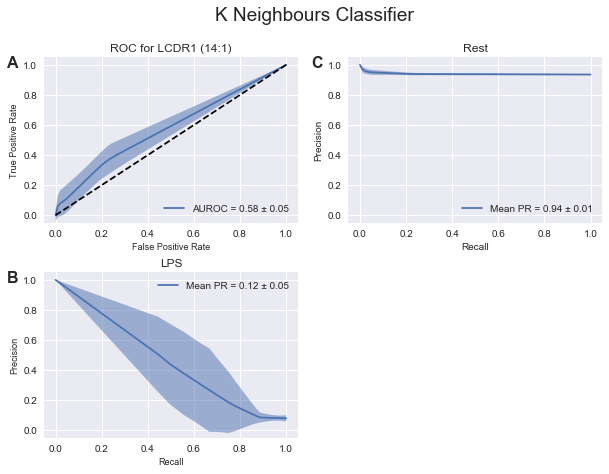

Student T test: t = 5.241807750798138, p-value = 0.00012469488161798316
Approximated baseline PR curve P/(P+N) =0.06666666666666667
Approximated baseline PR curve N/(N+P) =0.9333333333333333
Mean classifier accuracy = 0.9204603877886322 +/- 0.01773271060314043)
Mean Error rate = 0.07953961221136785 +/- 0.01773271060314043
Mean classifier precision = 0.28888888888888886 +/- 0.35728744868474505)
Mean classifier recall = 0.06944444444444443 +/- 0.08348751169518408)
Mean classifier AUC = 0.5764505000468947 +/- 0.05457116930308437)
Mean classifier null accuracy = 0.9342673357177174 +/- 0.003429821652785328)
[[123   0]
 [  8   1]]              precision    recall  f1-score   support

          0       0.94      1.00      0.97       123
          1       1.00      0.11      0.20         9

avg / total       0.94      0.94      0.92       132

[[122   0]
 [  9   0]]              precision    recall  f1-score   support

          0       0.93      1.00      0.96       122
          1       0.00

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[[122   0]
 [  8   0]]              precision    recall  f1-score   support

          0       0.94      1.00      0.97       122
          1       0.00      0.00      0.00         8

avg / total       0.88      0.94      0.91       130



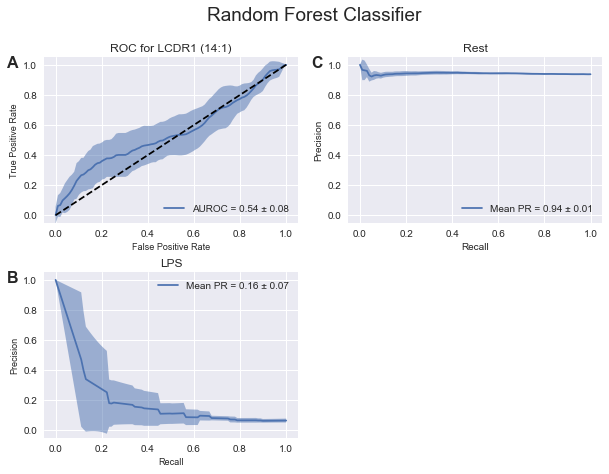

Student T test: t = 2.0092698281081125, p-value = 0.06419317476210847
Approximated baseline PR curve P/(P+N) =0.06666666666666667
Approximated baseline PR curve N/(N+P) =0.9333333333333333
Mean classifier accuracy = 0.9362952484326531 +/- 0.003475666343141764)
Mean Error rate = 0.0637047515673469 +/- 0.003475666343141764
Mean classifier precision = 0.26666666666666666 +/- 0.44221663871405337)
Mean classifier recall = 0.029629629629629627 +/- 0.04913518207933924)
Mean classifier AUC = 0.5446519540332015 +/- 0.08315076019408053)
Mean classifier null accuracy = 0.9342673357177174 +/- 0.003429821652785328)


In [23]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

#for every variable region in the feature matrix, extract features for that region
k = 3
for region in regions:
    features = df_dict[region]
    features.drop('region', axis=1, inplace=True)

    X_noclass = features.drop('peptide_label', axis=1)
    X = X_noclass.values
    print(X.shape)
    X_scaled = StandardScaler().fit_transform(X_noclass.values)
    
    #two classes:
    y = features['peptide_label'].values
    negative_ratio = int(Counter(y)[0]/Counter(y)[1])
    ratio_region = f'{negative_ratio}:1'
    
    print('{}: Number of negatives and positives:'.format(region), Counter(y))

    #Stratified cross validation for the imbalanced case.(Changing this in sss give different results!)
    RSKF = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
    sss = model_selection.StratifiedShuffleSplit(n_splits=100, test_size=0.2)
    
    #print(X.shape, X_scaled.shape, y.shape, np.unique(y))
    
    #Initialize the models
    m_names = ['K Neighbours Classifier', 'Random Forest Classifier']

    estimators = [ 
                  KNeighborsClassifier(n_neighbors=k), 
                  RandomForestClassifier(n_estimators=300, class_weight=weights),
                 ]

    models = zip(m_names, estimators)

    #scoring = ['accuracy', 'precision', 'recall']
    
    #Loop over models, plot the ROC curve and other metrics 
    for name,estimator in models:
            #for score in scoring:
        if name in ['SVC', 'K Neighbours Classifier']:
            X = X_scaled
                
        tprs, aucs, tprs_pr, aucs_pr = [],[],[],[]
        
        #Append over different folds
        fold_accuracies, fold_avg_precisions, fold_recalls, fold_aucs, fold_inv_preds= [],[],[],[],[]
        fold_precision_score, fold_null_accuracies, fold_balanced_acc_scores = [],[], []
        
        fig, axs = plt.subplots(2, 2, figsize=(10, 7))
        suptitle = f'{name}'
        fig.suptitle(suptitle, fontsize = 19)
        
        interval = np.linspace(0, 1, 100)
        tprs, precisions, precisions_inverted = [], [], []
        
        #Stratified K fold cross validation
        for train, test in RSKF.split(X, y):
            fit = estimator.fit(X[train], y[train])
            probas_ = fit.predict_proba(X[test])[:, 1]
            y_pred = fit.predict(X[test])
            
            fpr, tpr, _ = metrics.roc_curve(y[test], probas_)
            tprs.append(np.interp(interval, fpr, tpr))
            
            precision, recall, _ = metrics.precision_recall_curve(y[test], probas_)
            precisions.append(np.interp(interval, recall[::-1], precision))
            
            precision_inverted, recall_inverted, _ = metrics.precision_recall_curve(1 - y[test], 1 - probas_)
            precisions_inverted.append(np.interp(interval, recall_inverted[::-1], precision_inverted))
        
            clasrep = metrics.classification_report(y[test], y_pred)
            conf_mat = metrics.confusion_matrix(y[test], y_pred)
            
            #balanced_acc_score = metrics.balanced_accuracy_score(y[test], y_pred)
            auc_score = metrics.roc_auc_score(y[test], probas_)
            acc_score = metrics.accuracy_score(y[test], y_pred)
            precision_score = metrics.precision_score(y[test], y_pred)
            avg_precision_score = metrics.average_precision_score(y[test], probas_)
            recall_score = metrics.recall_score(y[test], y_pred)
            avg_precision_inverted_score = metrics.average_precision_score(1 - y[test], 1 - probas_)
            null_accuracy = max(y[test].mean(), 1 - y[test].mean())
            
            #bal_acc_score = metrics.bala
            
            #fold_balanced_acc_scores.append(balanced_acc_score)
            fold_accuracies.append(acc_score)
            fold_avg_precisions.append(avg_precision_score)
            fold_precision_score.append(precision_score)
            fold_recalls.append(recall_score)
            fold_aucs.append(auc_score)
            fold_inv_preds.append(avg_precision_inverted_score)
            fold_null_accuracies.append(null_accuracy)
            print(conf_mat, clasrep)
            
        if name == 'Random Forest Classifier' and region == 'HCDR3':
            #feature importances
            rf = RandomForestClassifier(n_estimators=300, class_weight=weights).fit(X, y)
            feature_importances = pd.DataFrame(rf.feature_importances_,
                                               index = X_noclass.columns,
                                               columns=['importance']).sort_values('importance', ascending=False)
            #print(feature_importances)
            
        accuracy_mean, accuracy_std = np.mean(fold_accuracies), np.std(fold_accuracies)
        precision_score_mean, precision_score_std = np.mean(fold_precision_score), np.std(fold_precision_score)
        avg_precision_score_mean, avg_precision_score_std = np.mean(fold_avg_precisions), np.std(fold_avg_precisions)
        recall_mean, recall_std = np.mean(fold_recalls), np.std(fold_recalls)
        auc_mean, auc_std = np.mean(fold_aucs), np.std(fold_aucs)
        avg_precision_inverted_mean, avg_precision_inverted_std = np.mean(fold_inv_preds), np.std(fold_inv_preds)
        mean_null_accuracy, null_accuracy_std = np.mean(fold_null_accuracies), np.std(fold_null_accuracies)
        #mean_balanced_accuracy, balanced_accuracy_std = np.mean(fold_balanced_acc_scores), np.std(fold_balanced_acc_scores)
        
        tpr_mean = np.mean(tprs, axis=0)
        tpr_mean[0], tpr_mean[-1] = 0.0, 1.0
        tpr_std = np.std(tprs, axis=0)
        precision_mean = np.mean(precisions, axis=0)
        precision_std = np.std(precisions, axis=0)
        precision_inverted_mean = np.mean(precisions_inverted, axis=0)
        precision_inverted_std = np.std(precisions_inverted, axis=0)
        
        #ROC curve
        
        axs[0, 0].plot(interval, tpr_mean, label='AUROC = {:.2f} ± {:.2f}'.format(auc_mean, auc_std))
        axs[0, 0].fill_between(interval, tpr_mean - tpr_std, tpr_mean + tpr_std, alpha=0.5)

        axs[0, 0].plot([0, 1], [0, 1], 'k--')

        axs[0, 0].set_xlim([-0.05, 1.05])
        axs[0, 0].set_ylim([-0.05, 1.05])

        axs[0, 0].set_xlabel('False Positive Rate', fontsize=9)
        axs[0, 0].set_ylabel('True Positive Rate', fontsize=9)
        
        axs[0, 0].set_title('ROC for {} ({})'.format(region, ratio_region))

        axs[0, 0].legend(loc='lower right')

        axs[0, 0].annotate(string.ascii_uppercase[0], xy=(-0.1,1.1), xycoords='axes fraction', fontsize=16,
                              xytext=(0, -15), textcoords='offset points', weight='bold',
                              ha='right', va='top')
        
        #PR curve 1
        positive_label_title = 'Non Peptide'
        negative_label_title = 'Peptide'
        if LPS == True:
            positive_label_title = 'LPS'
            negative_label_title = 'Rest'
            
        axs[1, 0].set_title(positive_label_title)

        axs[1, 0].plot(interval[::-1], precision_mean, label='Mean PR = {:.2f} ± {:.2f}'.format(avg_precision_score_mean, avg_precision_score_std))
        axs[1, 0].fill_between(interval[::-1], precision_mean - precision_std, precision_mean + precision_std,
                         alpha=0.5)

        axs[1, 0].legend(loc='best')

        axs[1, 0].set_xlim([-0.05, 1.05])
        axs[1, 0].set_ylim([-0.05, 1.05])

        axs[1, 0].set_xlabel('Recall', fontsize = 9)
        axs[1, 0].set_ylabel('Precision', fontsize = 9)

        plt.legend(loc='best')

        axs[1, 0].annotate(string.ascii_uppercase[1], xy=(-0.1,1.1), xycoords='axes fraction', fontsize=16,
                              xytext=(0, -15), textcoords='offset points', weight='bold',
                              ha='right', va='top')
        
        #PR curve 0
        axs[0, 1].set_title(negative_label_title)

        axs[0, 1].plot(interval[::-1], precision_inverted_mean, label='Mean PR = {:.2f} ± {:.2f}'.format(avg_precision_inverted_mean, avg_precision_inverted_std))
        axs[0, 1].fill_between(interval[::-1], precision_inverted_mean - precision_inverted_std,
                         precision_inverted_mean + precision_inverted_std, alpha=0.5)

        axs[0, 1].legend(loc='lower right')

        axs[0, 1].set_xlim([-0.05, 1.05])
        axs[0, 1].set_ylim([-0.05, 1.05])

        axs[0, 1].set_xlabel('Recall', fontsize = 10)
        axs[0, 1].set_ylabel('Precision', fontsize = 10)

        plt.legend(loc='lower right')

        axs[0, 1].annotate(string.ascii_uppercase[2], xy=(-0.1,1.1), xycoords='axes fraction', fontsize=16,
                              xytext=(0, -15), textcoords='offset points', weight='bold',
                              ha='right', va='top')
        
        #Feature ranking

        #for f in range(X.shape[1]):
        #    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

        # Plot the feature importances of the forest
        #axs[1, 1].title("Feature importances")
        #axs[1, 1].bar(range(X.shape[1]), importances[indices],
        #        color="r", yerr=std[indices], align="center")
        #axs[1, 1].xticks(range(X.shape[1]), indices)
        #axs[1, 1].xlim([-1, X.shape[1]])
        #axs[1, 1].show()

        #######
        
        fig.delaxes(axs[1,1])
        plt.subplots_adjust(hspace = 0.3)

        fig_name = figdir / f'classifier_{name}_{region}_{positive_label_title}_{negative_label_title}.pdf'
        #plt.savefig(fname = fig_name,  format='pdf')
        plt.show()
        plt.close()

    
        a,b = fold_aucs, np.repeat(0.5, len(fold_aucs))
        t, p = stats.ttest_1samp(a,popmean=0.5)
        print('Student T test: t = {}, p-value = {}'.format(t,p))
        print('Approximated baseline PR curve P/(P+N) ={}'.format((1/(negative_ratio+1))) )
        print('Approximated baseline PR curve N/(N+P) ={}'.format(negative_ratio/(negative_ratio+1)))
        
        ##############
        print('Mean classifier accuracy = {} +/- {})'.format(accuracy_mean, accuracy_std))
        print('Mean Error rate = {} +/- {}'.format(1-accuracy_mean, accuracy_std))
        print('Mean classifier precision = {} +/- {})'.format(precision_score_mean, precision_score_std))
        print('Mean classifier recall = {} +/- {})'.format(recall_mean, recall_std))
        print('Mean classifier AUC = {} +/- {})'.format(auc_mean, auc_std))
        print('Mean classifier null accuracy = {} +/- {})'.format( mean_null_accuracy, null_accuracy_std))
        #print('Mean classifier balanced accuracy = {} +/- {})'.format(mean_balanced_accuracy, balanced_accuracy_std))

In [24]:
1/17

0.058823529411764705

In [25]:
features = df_dict[region]
features.drop('region', axis=1, inplace=True)

X_noclass = features.drop('peptide_label', axis=1)
X = X_noclass.values
print(X.shape)
X_scaled = StandardScaler().fit_transform(X)
    
#two classes:
y = features['peptide_label'].values

estimator = KNeighborsClassifier(n_neighbors=10).fit(X_scaled, y)

fit = estimator.fit(X_scaled, y)
probas_ = fit.predict_proba(X_scaled)
y_pred = fit.predict(X_scaled)

KeyError: "labels ['region'] not contained in axis"

In [ ]:
probas_

In [ ]:
plt.hist(probas_)

In [ ]:
interval = np.linspace(0, 1, 100)

In [ ]:
interval